# Computer Lab Semester - 5

## Problem - 1

Solve the s-wave Schrödinger equation for the ground state and the first excited state of the hydrogen atom
\begin{align}
&\frac{d^2u}{dr^2}=A(r)u(r),\\
&A(r) = \frac{2m}{\hbar^2}[V(r)-E],\\
\mbox{where, } &V(r)=-\frac{e^2}{r}
\end{align}
where, m is the reduced mass of the electron. Obtain the energy eigenvalues and plot the corresponding wave
functions. Remember that the ground state energy of the hydrogen atom is ≈-13.6 eV. Take e=3.795 (eVÅ),
ħc= 1973(eVÅ) and m=0.511×10$^6$ eV/c$^2$.

## Time independent Scrodinger equation
\begin{equation}
\frac{d^2\psi(x)}{dx^2} + k^2(x)\psi(x) = 0
\end{equation}
where,
\begin{equation}
k^2(x)=\frac{2m}{\hbar^2}(E-V(x))
\end{equation}

We split the second order differential equation into two first order equations as below -
\begin{equation}
\begin{aligned}
&\frac{d\psi}{dx}=\phi(x)\\
&\frac{d\phi}{dx}=-k^2(x)\psi(x)
\end{aligned}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import bisect

In [2]:
# Basic parameters
E0   = -13.6     # approximate ground state energy
e    = 3.795      # charge of electron in eVA
hbarc = 1973   # in eVA
m    = 0.511e6    # in eV/c^2

# Based on the given parameters, calculate 2m/hbar^2c
C  = 2*m/hbarc**2

In [3]:
# Defining Helper Functions

def V(r):
    return - e**2/r 

def A(r):
    return C*(V(r)-E)

def dzdr(z, r):
    x, y = z
    dxdr = y
    dydr = A(r)*x
    dzdr = np.array([dxdr, dydr])
    return dzdr

def waveFunc(energy):
    global sol
    global E
    E = energy
    sol = odeint(dzdr, z[0], r)
    return sol[-1, 0]


In [13]:
# setting arrays for storing values

r = np.arange(1e-15, 8, 0.01)
z = np.zeros([len(r),2])
x0 = 0.001
y0 = 1
z[0] = [x0, y0]

In [19]:
# Finding energy eigen values

Energy = np.linspace(-20, 0, 100)
waveFuncRight = np.array([waveFunc(Eval) for Eval in Energy])
sign = np.sign(waveFuncRight)
eigenValue = []
for i in range(len(sign)-1):
    if sign[i] == - sign[i+1]:
        en = bisect(waveFunc, Energy[i], Energy[i+1])
        en = round(en,4)
        eigenValue += [en]

print('Energy Eigen Values are \n'+str(eigenValue))

Energy Eigen Values are 
[-13.7319, -3.4059, -0.7694]


In [20]:
# Plotting wavefunctions

def plot():
    fig, ax = plt.subplots(figsize=(8, 5))
    # set the x-spine
    ax.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()

plot()

color = ['red', 'blue', 'orange']
for i in range(len(eigenValue)):
    waveFunc(eigenValue[i])
    plt.plot(r, sol[:,0], color=color[i], label='n = '+str(i)+'   E'+str(i)+' = '+str(round(eigenValue[i],1)))

plt.xlabel('r')
plt.ylabel('$\psi(r)$')
plt.legend()
#plt.grid()
plt.show()

## Problem - 2

Solve the s-wave radial Schrödinger equation for an atom
\begin{align}
&\frac{d^2y}{dr^2}=A(r)u(r),\\
&A(r) = \frac{2m}{\hbar^2}[V(r)-E],\\
\mbox{where, } &V(r)=-\frac{e^2}{r}
\end{align}
Where m is the reduced mass of the system (which can be chosen to be the mass of an electron), for the screened Coulomb potential
\begin{align}
V(r) = -\frac{e^2}{r}e^{-r/a}
\end{align}
Find the energy (in eV) of the ground state of the atom to an accuracy of three significant digits. Also, plot the corresponding wave function. Take e=3.795 (eVÅ), and a=3 Å, 5 Å, and 7 Å in the units of ħc = 1973(eVÅ) and m=0.511×10$^6$ eV/c$^2$. The ground state energy is expected to be above -12 eV in all
three cases.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import bisect

In [22]:
# Basic parameters
E0 = -12       # approximate ground state energy
e = 3.795      # charge of electron in eVA
hbarc = 1973   # in eVA
m = 0.511e6    # in eV/c^2
a = 5          # in units of angstrum

# Based on the given parameters, calculate 2m/hbar^2c
C = 2*m/hbarc**2

In [23]:
# Defining Helper Functions

def V(r):
    return - (e**2/r )*np.exp(-r/a)

def A(r):
    return C*(V(r)-E)

def dzdr(z, r):
    x, y = z
    dxdr = y
    dydr = A(r)*x
    dzdr = np.array([dxdr, dydr])
    return dzdr

def waveFunc(energy):
    global sol
    global E
    E = energy
    sol = odeint(dzdr, z[0], r)
    return sol[-1, 0]

In [24]:
# setting arrays for storing values

r = np.arange(1e-15, 10, 0.01)
z = np.zeros([len(r),2])
x0 = 0.001
y0 = 1
z[0] = [x0, y0]

In [25]:
# Finding energy eigen values

Energy = np.linspace(-20, 0, 100)
waveFuncRight = np.array([waveFunc(Eval) for Eval in Energy])
sign = np.sign(waveFuncRight)
eigenValue = []
for i in range(len(sign)-1):
    if sign[i] == - sign[i+1]:
        en = bisect(waveFunc, Energy[i], Energy[i+1])
        eigenValue += [en]

print('Energy Eigen Values are \n'+str(eigenValue))

Energy Eigen Values are 
[-11.06410939502324, -1.284295766697573]


In [26]:
# Plotting wavefunctions

def plot():
    fig, ax = plt.subplots(figsize=(8, 5))
    # set the x-spine
    ax.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()

plot()

color = ['red', 'blue', 'orange']
for i in range(len(eigenValue)):
    waveFunc(eigenValue[i])
    plt.plot(r, sol[:,0], color=color[i], label='n = '+str(i)+'   E'+str(i)+' = '+str(round(eigenValue[i],1)))

plt.xlabel('r')
plt.ylabel('$\psi(r)$')
plt.text(8,0.08, '$V(r)=\\frac{e^2}{r}e^{-r/a};  \\ a$ = '+str(a))
plt.legend()
#plt.grid()
plt.show()

## Problem 3

Solve the s-wave Schrodinger equation for the ground state and the first excited state of the hydrogen atom
\begin{equation}
\frac{d^2y}{dr^2}=A(r)u(r),\hspace{1cm}A(r)=\frac{2m}{\hbar^2}[V(r) - E]\mbox{~where~}V(r)=-\frac{e^2}{r}
\end{equation}
The anharmonic potential
\begin{equation}
V(r)=\frac{1}{2}kr^2 + \frac{1}{3}br^3
\end{equation}
for  the ground state energy (in MeV) of particle to an accuracy of three significant digits. Also, plot the corressponding wave function. Choose $m=940 MeV/c^2$, $k=100 MeVfm^{-2}$, $b=0,10,30 MeVfm^{-3}$. In these units, $c\hbar=940 MeV/c^2$, $k=100 MeVfm^{-3}$ for all three cases. The ground state energy is expected to lie in between 90 and 110 MeV for all three cases.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import newton, bisect, brentq
from scipy.constants import hbar, m_e

In [ ]:
# Defining helper functions

# (1) Potential function

def V(r):
    V = (1/2)*k*r**2 + (1/3)*b*r**3
    return V

# (2) Defining A(r)

def A(r):
    a = (2*m_e/ħc**2)*(V(r) - E)
    return a

# (3) Defining Derivative functions of 'y'

def deriv(y, r):
    return np.array([y[1], A(r)*y[0]])

# (4) Defining wave function with respect to energy

def waveFunc(energy):
    global E
    global psi
    E = energy
    psi = odeint(deriv, psi0, r)
    return psi[-1, 0]

# (5) Finding zero of the wavefuncton by Shooting method

def zero(x, y):
    energyEigenValue = []
    s = np.sign(y)
    #s = np.array(s, dtype=int)
    for i in range(len(s)-1):
        if s[i] == -s[i+1]:
            zero = bisect(waveFunc, x[i], x[i+1])
            energyEigenValue.append(zero)
    return energyEigenValue

# Vectorizing the functions
V        = np.vectorize(V)
waveFunc = np.vectorize(waveFunc)
zero = np.vectorize(zero)

In [ ]:
# Important parameters

m_e = 940
ħc = 197.3
k = 100
# Initialisation

N = 1000                              # Number of points on x-axis
psi = np.zeros([N, 2])                # To store wave function values and its derivative
psi0 = np.array([0.001, 0])           # wavefunction of initial staes

b = 0
r = np.linspace(-3, 3, N)              # x - axis

In [ ]:
En = np.arange(0, 150, 1)
psiRight = waveFunc(En)
#psiRight

In [ ]:
def zero(x, psi):
    energyEigenValue = []
    s = np.sign(psi)
    #s = np.array(s, dtype=int)
    for i in range(len(s)-1):
        if s[i] == -s[i+1]:
            zero = bisect(waveFunc, x[i], x[i+1])
            energyEigenValue.append(zero)
    return energyEigenValue

## Problem 4

Solve the s-wave Schrodinger equation for the hydrogen molecule
\begin{equation}
\frac{d^2y}{dr^2}=A(r)u(r),\hspace{1cm}A(r)=\frac{2\mu}{\hbar^2}[V(r) - E]
\end{equation}
where, $\mu$ is the reduced mass of the two-atom system for the Morse potential. 
\begin{equation}
V(r)=D\left(e^{-2\alpha r^{\prime}} - e^{-\alpha r^{\prime}}\right),\hspace{0.5cm}r^{\prime}=\frac{r - r_0}{r}
\end{equation}
Find the lowest vibrational energy (in MeV) of the molecule to an accuracy of three significant digits. Also plot
the corressponding wave function. Take $m=940\times 10^6 eV/c^2$, $D=0.755501$, $\alpha=1.44$ and $r_0=0.131349  \overset{\circ}{A}$

Morse potential expression given is wrong. The correct form is
\begin{align}
V(r) &= D \left[1 - e^{-\alpha(r-r_0)}\right]^2\\
V(r) &=D\left(1 - 2e^{-\alpha r^{\prime}} + e^{-2\alpha r^{\prime}}\right), \hspace{0.5cm} r^{\prime}=\frac{r - r_0}{r}
\end{align}

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import newton, bisect, brentq
from scipy.constants import hbar, m_e

In [28]:
# Defining helper functions

# (1) Potential function

def V(r, r0, α, D):
    V = D*(1 - np.exp(-α*(r - r0)))**2
    return V
    
# (2) Defining A(r)

def A(r):
    a = (2*μ/ħc**2)*(V(r, r0, α, D) - E)
    return a

# (3) Defining Derivative functions of 'y'

def deriv(y, r):
    return np.array([y[1], A(r)*y[0]])

# (4) Defining wave function with respect to energy

def waveFunc(energy):
    global E
    global psi
    E = energy
    psi = odeint(deriv, psi0, r)
    return psi[-1, 0]

# (5) Finding zero of the wavefuncton by Shooting method

def zero(x, y):
    energyEigenValue = []
    s = np.sign(y)
    #s = np.array(s, dtype=int)
    for i in range(len(s)-1):
        if s[i] == -s[i+1]:
            zero = bisect(waveFunc, x[i], x[i+1])
            energyEigenValue.append(zero)
    return energyEigenValue

# Vectorizing the functions
V        = np.vectorize(V)
waveFunc = np.vectorize(waveFunc)
zero = np.vectorize(zero)

In [29]:
# Important parameters

μ = 940e6
D = 0.755501
α = 1.44
r0 = 0.131349
ħc = 1973

# Initialisation

N = 100                              # Number of points on x-axis
psi = np.zeros([N, 2])                # To store wave function values and its derivative
psi0 = np.array([0.001, 2])           # wavefunction of initial staes


r = np.linspace(-0.2, 0.2, 100)              # x - axis

In [30]:
En = np.arange(0, 15, 1)
psiRight = waveFunc(En)
#psiRight

In [31]:
def zero(x, psi):
    energyEigenValue = []
    s = np.sign(psi)
    #s = np.array(s, dtype=int)
    for i in range(len(s)-1):
        if s[i] == -s[i+1]:
            zero = bisect(waveFunc, x[i], x[i+1])
            energyEigenValue.append(zero)
    return energyEigenValue

In [32]:
EigenValue = np.array(zero(En, psiRight))
EigenValue

array([ 1.21457505,  2.10732938,  3.2543345 ,  4.65597459,  6.31235437,
        8.22351125, 10.389463  , 12.81021612])

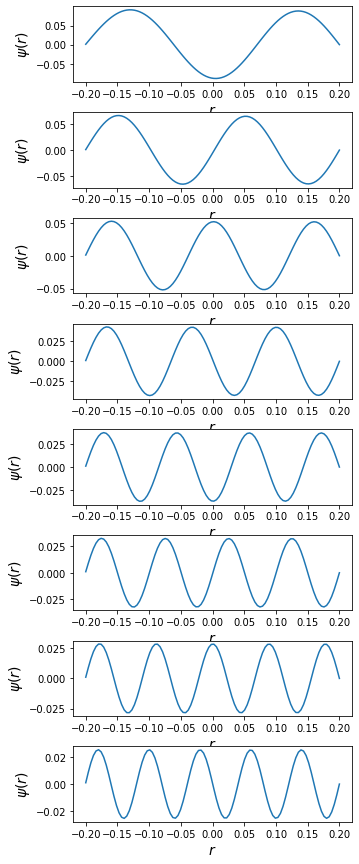

In [33]:
fig = plt.figure(figsize=(5, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
j=1
for i in range(len(EigenValue)):
    ax = fig.add_subplot(len(EigenValue), 1, j)
    waveFunc(EigenValue[i])
    plt.plot(r, psi.transpose()[0])
    #plt.legend()
    plt.xlabel('$r$', fontsize=14)
    plt.ylabel('$\psi(r)$', fontsize=14)
    j+=1
plt.show()